# Linear Regression Part (A)
## Getting the Dataset

In [18]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path = "./"

filename_read = os.path.join(path,"drinks.csv")
drink_Data = pd.read_csv(filename_read, na_values=['NA','?'])
drink_Data.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
5,Antigua & Barbuda,102,128,45,4.9,North America
6,Argentina,193,25,221,8.3,South America
7,Armenia,21,179,11,3.8,Europe
8,Australia,261,72,212,10.4,Oceania
9,Austria,279,75,191,9.7,Europe


## Simple Linear Regression

Using the total_litre_of_pure_alcohol column to derive its mean and standard deviation, we plot it onto a graph where the y-axis is the continent (in integer) and the x-axis is the mean of the total_litres_of_pure_alcohol column.

In [19]:
import pandas as pd

drink_Data.head()

new_drink_Data = drink_Data[['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']]

new_drink_Data['Combine_Servings'] = new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings']

new_drink_Data.head()

C:\Users\sho85\AppData\Local\Temp\ipykernel_6756\1845018562.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_drink_Data['Combine_Servings'] = new_drink_Data['beer_servings'] + new_drink_Data['spirit_servings'] + new_drink_Data['wine_servings']


,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Combine_Servings
0,0,0,0,0.0,0
1,89,132,54,4.9,275
2,25,0,14,0.7,39
3,245,138,312,12.4,695
4,217,57,45,5.9,319


In [20]:
x = new_drink_Data.iloc[:, -1:].values  #independent variable arrays, Combine_Servings
y = new_drink_Data.iloc[:, 3].values  #dependent variable arrays, Total_Litres_Of_Pure_Alcohol

In [21]:
# Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/4, random_state=0)

In [22]:
# Fitting
# from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [23]:
# Predicting; y_pred are the predicted results of the Combine_Servings
y_pred = regressor.predict(x_test)
y_pred

array([ 0.62653097,  5.02691569,  8.45512239,  0.7288655 ,  0.62653097,
        1.59870899,  1.49637446,  1.54754173,  3.13372691,  4.22529522,
        5.31686352,  6.92010446,  7.14182927,  5.28275201,  0.83120003,
        6.16965125,  0.93353456,  4.68580059,  6.64721239,  1.99099135,
        0.96764606,  1.1040921 ,  0.62653097,  1.13820361,  1.37698418,
        1.68398776,  2.22977191,  4.77107937,  1.58165323,  2.04215861,
       11.59338125,  6.06731673,  3.28722871,  1.35992842, 11.96860786,
        7.56822314,  1.2917054 ,  3.57717654, 11.64454852,  1.47931871,
        9.92191729,  0.7288655 , 11.09876437,  2.05921437,  0.62653097,
        1.58165323, 11.67866003,  1.20642663,  2.7243888 ])

In [24]:
# Real total_litres_of_pure_alcohol in the test set
y_test

array([ 0. ,  4.6,  8.2,  0.1,  0. ,  1. ,  1.1,  8.3,  2.6,  3.8,  4.9,
        6.7,  8.2,  4.9,  0.2,  5.8,  0.5,  4.2,  6.3,  2.5,  1.8,  0.5,
        0. ,  6.7,  1.8,  1.1,  4.7,  5.4,  1. ,  1.5, 12.9,  5.9,  2.8,
        5.7, 11.8,  7.2,  4.3,  3.1, 11.5,  0.9, 10.4,  0.1, 10.9,  1.5,
        0. ,  1. , 11.8,  0.6,  2.2])

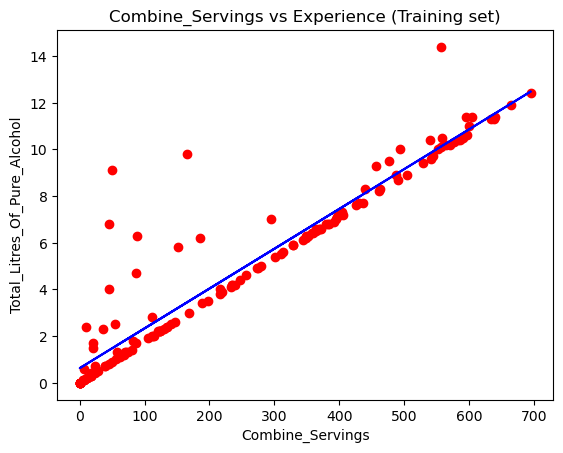

In [25]:
#plot for the TRAIN
 
plt.scatter(x_train, y_train, color='red') # plotting the observation line
 
plt.plot(x_train, regressor.predict(x_train), color='blue') # plotting the regression line
 
plt.title("Combine_Servings vs Experience (Training set)") # stating the title of the graph
 
plt.xlabel("Combine_Servings") # adding the name of x-axis
plt.ylabel("Total_Litres_Of_Pure_Alcohol") # adding the name of y-axis
plt.show() # specifies end of graph

Root mean squared error = 1.5897
R-squared = 0.8160


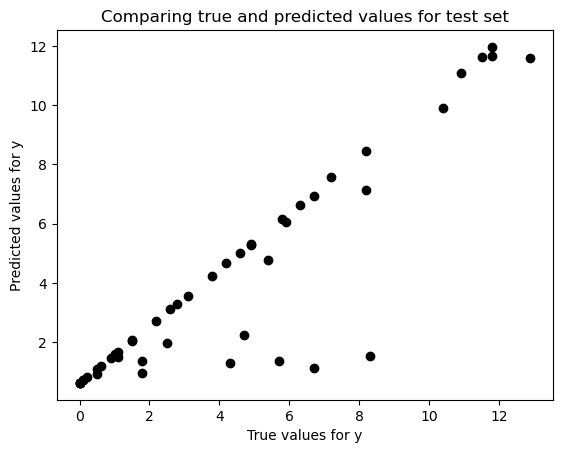

In [26]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

## Multiple Linear Regression